files bias$k ("bias"+str(k)) are computed by reprocessing the demuxed concateneted trajectory for each replica.

In [1]:
import plumed
import numpy as np

Bias=[]
for k in range(8):
    bias=plumed.read_as_pandas("bias"+str(k))
    bias["sum"]=bias["metad5.bias"]
    for i in ((6,7,8,9,10,11,12,13,14,15,16,25,26,27,28,29,30,31,32,33,34,35,36)):
        bias["sum"]+=bias["metad"+str(i)+".bias"]
    Bias.append(bias["sum"])
Bias=np.array(Bias)
Bias=np.transpose(Bias)
for j in range(8):
    Bias[:,j]-=np.min(Bias[:,j])
Bias    

/u/v/vpiompon/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: cannot load PLUMED instance, conversions will not be available
  


array([[  0.      , 164.676984, 248.927821, ..., 417.507163, 444.555699,
        459.841967],
       [  0.      , 166.832916, 255.630977, ..., 424.090374, 448.812726,
        461.681773],
       [  0.      , 161.392065, 245.850346, ..., 406.44488 , 429.657262,
        442.205597],
       ...,
       [  0.      ,  22.860119,  47.462401, ..., 141.588648, 159.969952,
        171.721516],
       [  0.      ,  18.660064,  41.930317, ..., 137.699716, 156.159215,
        167.792121],
       [  0.      ,  23.603159,  45.108016, ..., 137.732584, 155.747139,
        167.356518]])

Computing weights with binless Weighted Histogram method from bussilab python package 

In [2]:
from bussilab import wham
import plumed

a =wham.wham(bias=Bias, T=2.476, maxiter=10000)

In [3]:
np.save("logW", a.logW)

Checking sugar puckering populations on the reweighted ensemble

In [6]:
import plumed
cv=plumed.read_as_pandas("COLVAR")

/u/v/vpiompon/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: cannot load PLUMED instance, conversions will not be available
  


In [7]:
nucls=(5,6,7,8,9,10,11,12,13,14,15,16,25,26,27,28,29,30,31,32,33,34,35,36)

list=[]
for k in nucls:

    count=0
    for i in range(len(cv["puck"+str(k)+".Zx"])):
        if cv["puck"+str(k)+".Zx"][i]<0:
            count+=np.exp(a.logW[i])
    list.append((k,count))
    
list

[(5, 5.65458212168624e-07),
 (6, 2.1986015249309793e-05),
 (7, 0.00031903835618646525),
 (8, 0.0007716391910412615),
 (9, 0.0010995885106708436),
 (10, 0.00047204265855060895),
 (11, 0.0022273706588008617),
 (12, 0.0035478676631405027),
 (13, 0.001465872293416015),
 (14, 0.0017778203365731073),
 (15, 0.000692826294232536),
 (16, 0.001270877920417485),
 (25, 7.968752543238527e-06),
 (26, 1.2306827856693547e-06),
 (27, 9.67105381699603e-05),
 (28, 0.002615018811813153),
 (29, 0.0014008689767303956),
 (30, 0.0026321386186894664),
 (31, 0.013713023067626383),
 (32, 0.011132260494329284),
 (33, 0.000759579649138451),
 (34, 0.0010237438903574066),
 (35, 8.210565345445174e-05),
 (36, 2.8984936227218305e-05)]

In [10]:
import numpy as np
from importlib.machinery import SourceFileLoader
bb = SourceFileLoader("barnbaba","/net/sbp/sbpstore1/vpiompon/barnaba/barnaba/__init__.py").load_module()


traj="dump.xtc"
top="rna.pdb"

In [11]:
stackings, pairings, res = bb.annotate(traj, topology=top)

# Loading dump.xtc 


In [ ]:
import numpy as np
wei=np.exp(np.load('logW.npy'))
wei=wei[::100]
wei/=np.sum(wei)

In [13]:
def any_pairings(pairings):
    count=np.zeros((40,40))
    count_wc=np.zeros((40,40)) 
    diag=[]
    diag_wc=[]
    for i in range(len(pairings)):
        for j in range(len(pairings[i][1])):
            if pairings[i][1][j]=='WCc' or pairings[i][1][j]=='GUc'or pairings[i][1][j]=='WWc':
                count[pairings[i][0][j][0],pairings[i][0][j][1]]+=wei[i]
            if pairings[i][1][j]=='WCc' or pairings[i][1][j]=='WWc':
                count_wc[pairings[i][0][j][0],pairings[i][0][j][1]]+=wei[i]    

    for i in range(len(count)):
        diag.append(count[i,-i-1])
        diag_wc.append(count_wc[i,-i-1])   
    return(diag, diag_wc)

def comp_pairings(pairings):
    count=np.zeros((40,40))
    count_wc=np.zeros((40,40)) 
    diag=[]
    diag_wc=[]
    for i in range(len(pairings)):
        for j in range(len(pairings[i][1])):
            if (pairings[i][1][j]=='WCc' or pairings[i][1][j]=='GUc'or pairings[i][1][j]=='WWc') and mapping[pairings[i][0][j][0]]==pairings[i][0][j][1]:
                count[pairings[i][0][j][0],pairings[i][0][j][1]]+=wei[i]
            if (pairings[i][1][j]=='WCc' or pairings[i][1][j]=='WWc') and mapping[pairings[i][0][j][0]]==pairings[i][0][j][1]:
                count_wc[pairings[i][0][j][0],pairings[i][0][j][1]]+=wei[i]    

    for i in range(len(count)):
        diag.append(count[i,-i-1])
        diag_wc.append(count_wc[i,-i-1])   
    return(diag, diag_wc)

mapping=np.zeros(40)
for j in range(40):
    mapping[j]=39-j

In [37]:
any_pairs=any_pairings(pairings)

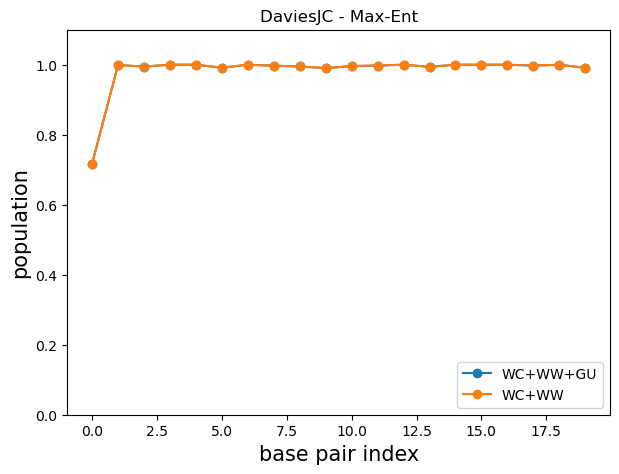

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 5))

xline=np.arange(0,20)
names = ['AU', 'CG', 'UA', 'GC', 'GC', 'AU', 'CG', 'AU', 'IU', 'IU', 'UI', 'IU', 'CG', 'UA', 'CG','CG','GC','AU','GC','GC'] 

plt.title('DaviesJC - Max-Ent')
plt.ylabel('population', fontsize=15)
plt.xlabel('base pair index', fontsize=15)
plt.ylim([0,1.1])

plt.plot(xline, any_pairs[0][:20], 'o-', label='WC+WW+GU')
plt.plot(xline, any_pairs[1][:20], 'o-', label='WC+WW')
plt.legend(loc='lower right', fontsize=10)

In [16]:
import numpy as np
from bussilab import wham
#Bias=np.load("../Bias.npy")
bias=Bias[::100]
bias=bias[:-1]
nw=np.ones(len(bias))
#a=wham.wham(bias=bias, T=2.494, maxiter=10000)

In [18]:
Nene=200
any_pairs=[]
comp_pairs=[]

#Reading Demux indexes, they are needed to correctly count how much times the extracted trajecotries spend in each Hamiltonian system
replica_temp=np.loadtxt("replica_temp.xvg")
replica_temp=replica_temp[:,1:]
replica_temp=replica_temp.astype(int)


for m in range(Nene):
    bias=Bias[::100]
    bias=bias[:-1]
    tr_w=np.zeros(8)
    sample=np.random.choice(8,size=8)
    for k in range(len(sample)):
        L=np.bincount(replica_temp[:,sample[k]],minlength=8)
        for j in range(len(L)):
            tr_w[j]+=L[j]
            
            
    bias=bias.reshape((8,-1,8))[sample,:,:].reshape((-1,8))
    a=wham.wham(bias=bias, T=2.494, traj_weight=tr_w, maxiter=10000, logZ=a.logZ)
    wei=np.exp(a.logW)*(nw.reshape(8,-1)[sample,:].reshape(-1))
    wei/=np.sum(wei)
    
    shuffle_pairs=[]
    size=int(len(wei)/8)
    for s in range(8):
        for r in range(size):  
            shuffle_pairs.append(pairings[sample[s]*size+r])
                                
    any_pairs.append(any_pairings(shuffle_pairs))
    comp_pairs.append(comp_pairings(shuffle_pairs))

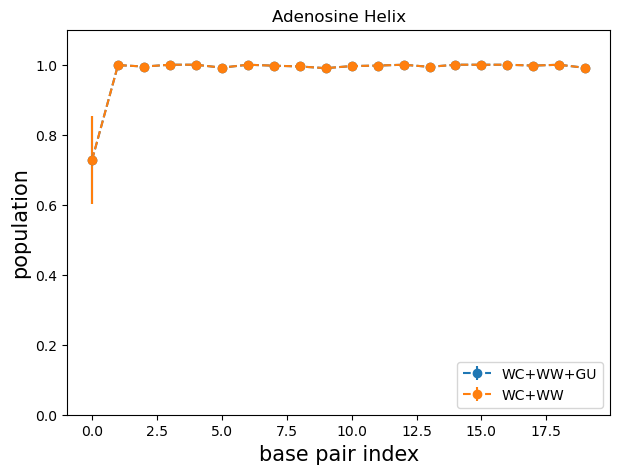

In [25]:
any_pairs=np.array(any_pairs)

import matplotlib.pyplot as plt
plt.figure(figsize=(7, 5))

xline=np.arange(0,20)
names = ['AU', 'CG', 'UA', 'GC', 'GC', 'AU', 'CG', 'AU', 'IU', 'IU', 'UI', 'IU', 'CG', 'UA', 'CG','CG','GC','AU','GC','GC'] 

plt.title('Adenosine Helix')
plt.ylabel('population', fontsize=15)
plt.xlabel('base pair index', fontsize=15)
plt.ylim([0,1.1])

plt.errorbar(xline, np.mean(any_pairs[:,0,:20],axis=0), np.std(any_pairs[:,0,:20], axis=0), fmt='--o', capthick=5, label='WC+WW+GU')
plt.errorbar(xline, np.mean(any_pairs[:,1,:20],axis=0), np.std(any_pairs[:,1,:20], axis=0), fmt='--o', capthick=5, label='WC+WW')
plt.legend(loc='lower right', fontsize=10)

In [20]:
np.save('../../Ade_mean_pairings',np.mean(any_pairs[:,0,:20],axis=0))
np.save('../../Ade_std_pairings',np.std(any_pairs[:,0,:20],axis=0))

In [24]:
np.save('../../Ade_C2_pops',np.array(list)[:,1])

In [26]:
angles_p,rr = bb.pucker_angles(traj,topology=top)
angles_s=angles_p[:,[7,8,9,10,11,12,27,28,29,30,31,32,],0]

# Loading dump.xtc 


In [27]:
def C2_coop(angles_s):
    P11=np.zeros((12,12)) #count both C2
    P01=np.zeros((12,12)) #count no C2
    P10=np.zeros((12,12)) #count only first C2
    P00=np.zeros((12,12)) #count only second C2
    for i in range(len(angles_s)):
        for j in range(len(angles_s[i])):


            if (angles_s[i][j] > 1.5 and angles_s[i][j] < 4): 
                P11[j,np.where((angles_s[i][:] > 1.5) & (angles_s[i][:] < 4))]+=wei[i]
                P10[j,np.where((angles_s[i][:] < 1.5) | (angles_s[i][:] > 4))]+=wei[i]
            else:
                P01[j,np.where((angles_s[i][:] > 1.5) & (angles_s[i][:] < 4))]+=wei[i]
                P00[j,np.where((angles_s[i][:] < 1.5) | (angles_s[i][:] > 4))]+=wei[i] 
    return(-2.494*np.log(P11*P00/(P01*P10)))

In [ ]:
Nene=1000
Coop=[]

#Reading Demux indexes, they are needed to correctly count how much times the extracted trajecotries spend in each Hamiltonian system
replica_temp=np.loadtxt("replica_temp.xvg")
replica_temp=replica_temp[:,1:]
replica_temp=replica_temp.astype(int)


for m in range(Nene):
    bias=Bias[::100]
    bias=bias[:-1]
    tr_w=np.zeros(8)
    sample=np.random.choice(8,size=8)
    for k in range(len(sample)):
        L=np.bincount(replica_temp[:,sample[k]],minlength=8)
        for j in range(len(L)):
            tr_w[j]+=L[j]
            
            
    bias=bias.reshape((8,-1,8))[sample,:,:].reshape((-1,8))
    a=wham.wham(bias=bias, T=2.494, traj_weight=tr_w, maxiter=10000, logZ=a.logZ)
    wei=np.exp(a.logW)*(nw.reshape(8,-1)[sample,:].reshape(-1))
    wei/=np.sum(wei)
    shuffle=np.array(angles_s[:-1].reshape(8,-1,12))[sample,:,:].reshape(-1,12)
    
    Coop.append(C2_coop(shuffle))

/u/v/vpiompon/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  


In [44]:
np.save('Coop.npy',Coop)

In [ ]:
Coop=np.array(Coop)
Mean=np.mean(Coop,axis=0)
Std=np.std(Coop,axis=0)
Count=(Coop < 0).sum(axis=0)

In [42]:
Count

array([[1000, 1000,  747,  182,  183,   18,  418,    1,   23,   10,    5,
         247],
       [1000, 1000,  998,  275,  225,    1,  664,    1,    9,   81,  221,
         662],
       [ 747,  998, 1000,  983,  954,  633,  569,   96,  452,    0,    0,
          70],
       [ 182,  275,  983, 1000,  999,  943,  169,  291,  252,   24,   25,
           0],
       [ 183,  225,  954,  999, 1000,  981,  400,  164,  101,    7,   22,
           0],
       [  18,    1,  633,  943,  981, 1000,    0,    0,   21,    0,    5,
         221],
       [ 418,  664,  569,  169,  400,    0, 1000, 1000, 1000,  175,  193,
         301],
       [   1,    1,   96,  291,  164,    0, 1000, 1000, 1000,  877,  488,
         739],
       [  23,    9,  452,  252,  101,   21, 1000, 1000, 1000,  999,  978,
         835],
       [  10,   81,    0,   24,    7,    0,  175,  877,  999, 1000,  999,
         998],
       [   5,  221,    0,   25,   22,    5,  193,  488,  978,  999, 1000,
        1000],
       [ 247,  662,  

In [39]:
def benjamini(coop,N=1000,p=0.05):
    plt.plot((N-np.sort(coop)[::-1])/N,"o")
    plt.plot((0,len(coop)),(p/len(coop),p))
    plt.ylim((0,p))

In [45]:
def anti_benjamini(coop,N=1000,p=0.05):
    plt.plot((np.sort(coop))/N,"o")
    plt.plot((0,len(coop)),(p/len(coop),p))
    plt.ylim((0,p))

In [ ]:
ce_res=['A8','I9','I10','U11','I12','C13','G28','U29','I30','U31','U32','U33']
xdata=[]
ydata=[]
zdata=[]
sel=[1,2,3,4,7,8,9,10]
for j in range(8):
    for i in range(8):
    
        xdata.append(ce_res[sel[i]])
        ydata.append(ce_res[sel[j]])
        zdata.append(Mean[sel[i]][sel[j]])

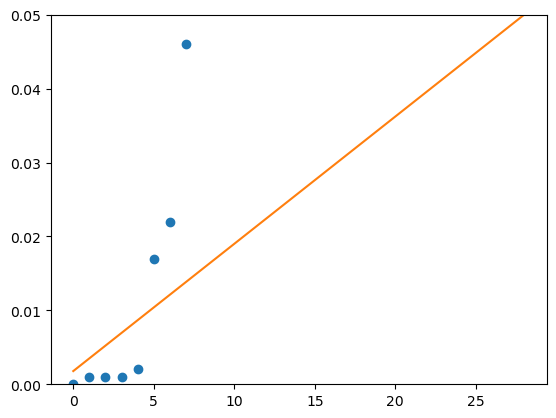

In [40]:
signif=[]
index=[]
ind_res=[]
for i in range(len(sel)):
    for j in range(len(sel)-i-1):
        signif.append(Count[sel[i],sel[j+1+i]])
        index.append([sel[i],sel[j+1+i]])
        ind_res.append((ce_res[sel[i]],ce_res[sel[j+1+i]]))
benjamini(signif)

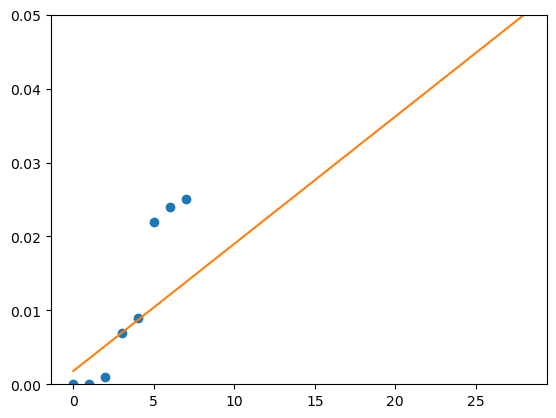

In [46]:
anti_benjamini(signif)

In [48]:
np.array(ind_res)[np.argsort(signif)[::-1]]

array([['U29', 'I30'],
       ['U31', 'U32'],
       ['U11', 'I12'],
       ['I30', 'U31'],
       ['I9', 'I10'],
       ['I10', 'U11'],
       ['I30', 'U32'],
       ['I10', 'I12'],
       ['U29', 'U31'],
       ['U29', 'U32'],
       ['I10', 'I30'],
       ['U11', 'U29'],
       ['I9', 'U11'],
       ['U11', 'I30'],
       ['I9', 'I12'],
       ['I9', 'U32'],
       ['I12', 'U29'],
       ['I12', 'I30'],
       ['I10', 'U29'],
       ['I9', 'U31'],
       ['U11', 'U32'],
       ['U11', 'U31'],
       ['I12', 'U32'],
       ['I9', 'I30'],
       ['I12', 'U31'],
       ['I9', 'U29'],
       ['I10', 'U31'],
       ['I10', 'U32']], dtype='<U3')

In [49]:
np.array(ind_res)[np.argsort(signif)]

array([['I10', 'U32'],
       ['I10', 'U31'],
       ['I9', 'U29'],
       ['I12', 'U31'],
       ['I9', 'I30'],
       ['I12', 'U32'],
       ['U11', 'U31'],
       ['U11', 'U32'],
       ['I9', 'U31'],
       ['I10', 'U29'],
       ['I12', 'I30'],
       ['I12', 'U29'],
       ['I9', 'U32'],
       ['I9', 'I12'],
       ['U11', 'I30'],
       ['I9', 'U11'],
       ['U11', 'U29'],
       ['I10', 'I30'],
       ['U29', 'U32'],
       ['U29', 'U31'],
       ['I10', 'I12'],
       ['I30', 'U32'],
       ['I10', 'U11'],
       ['I9', 'I10'],
       ['I30', 'U31'],
       ['U11', 'I12'],
       ['U31', 'U32'],
       ['U29', 'I30']], dtype='<U3')

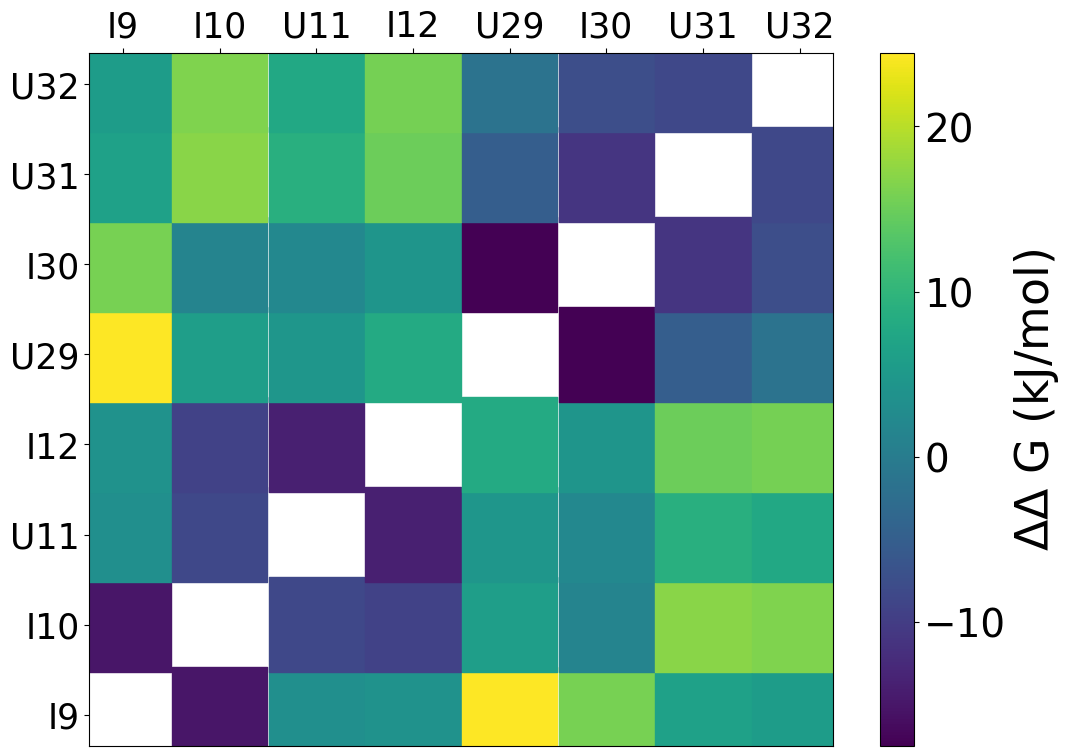

In [43]:
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt


plt.figure(figsize=(12,9))
ax = plt.axes()


# Data for three-dimensional scattered points


#ax.set_xlabel(r'$\alpha$ ($e^{-2}$)', fontsize=33)
#ax.set_ylabel(r'$\beta$ $(kJ/mol)^{-1}$', fontsize=33)

ax.xaxis.tick_top()
ax.tick_params(axis='both', which='major', labelsize=25)
#ax.set_xticks([0.1,1,10,100,1000,10000,100000])

#ax.set_zscale('log')
#ax.xaxis._set_scale('log')
pnt3d=ax.scatter(xdata, ydata, c=zdata, marker='s', s=4700);
#pnt3d=ax.contourf(xdata, ydata, zdata, cmap='hot')
cbar=plt.colorbar(pnt3d, aspect=20)
cbar.ax.tick_params(labelsize=28) 
cbar.set_label(r'$\Delta \Delta$ G (kJ/mol)', fontsize=33)


plt.show()